#### 2000 variable selection run ensemble:

In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
pred_sel_list = []

directory = '/rds/general/user/tk22/home/fire_genesis/predictor_sel_run/'
count = 0
for i in range(2000):
    try:
        with open(directory + f'predictor_list_{i}.txt') as f:
            pred_sel_list.append(json.load(f))
        count += 1
    except:
        pass

In [3]:
a, b = np.unique(np.array(pred_sel_list), return_counts = True)

In [4]:
df = pd.DataFrame({'Variables': a, 'Rate Selected': b/count})#.to_csv('temp.csv')

In [5]:
df

,Variables,Rate Selected
0,BROADLEAF,0.000501
1,CROP,0.301452
2,DTR,1.000000
3,GPP_100d,0.449675
4,GPP_10y,0.013520
5,GPP_150d,0.003505
6,GPP_1y,0.906360
7,GPP_2y,0.071607
8,GPP_50d,0.548322
9,GPP_5y,0.008513


### 100 variable selection x 100 variable truncation ensemble:

In [6]:
from os import listdir
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from paretoset import paretoset
from quick_build import *
import time
from matplotlib import colors
from cartopy import crs as ccrs

In [7]:
direc = '/rds/general/user/tk22/home/fire_genesis/step_3/output/'
paths = listdir(direc)

key_stats = ['AUC', 'NME_geospatial', 'NME_interannual', 'NME_seasonal', 'MPD_seasonal']

data_list = []
for path in paths:
    if path[-4:] == '.csv':
        temp = pd.read_csv(direc + path)
        temp = temp.set_index(temp.columns[0])
        data_list.append([int(path.split('_')[-1].split('.')[0])] + list(temp.loc[key_stats]['value']))
df = pd.DataFrame(data_list, columns = ['code']+key_stats)

In [8]:
metrics = df[['NME_geospatial', 'NME_interannual', 'NME_seasonal', 'MPD_seasonal']]
mask = paretoset(metrics, sense=['min','min','min','min'])
superior_df = df[mask]
inferior_df = df[~mask]
best_code = int(superior_df[superior_df.AUC == superior_df.AUC.max()].code)
superior_codes = list(superior_df.code)
all_codes = list(df.code)

In [9]:
df.AUC.min()

0.853094673704294

In [10]:
np.round(superior_df.NME_interannual.mean(),2)

0.67

/var/tmp/pbs.8289143.pbs/ipykernel_1623021/3870295345.py:16: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


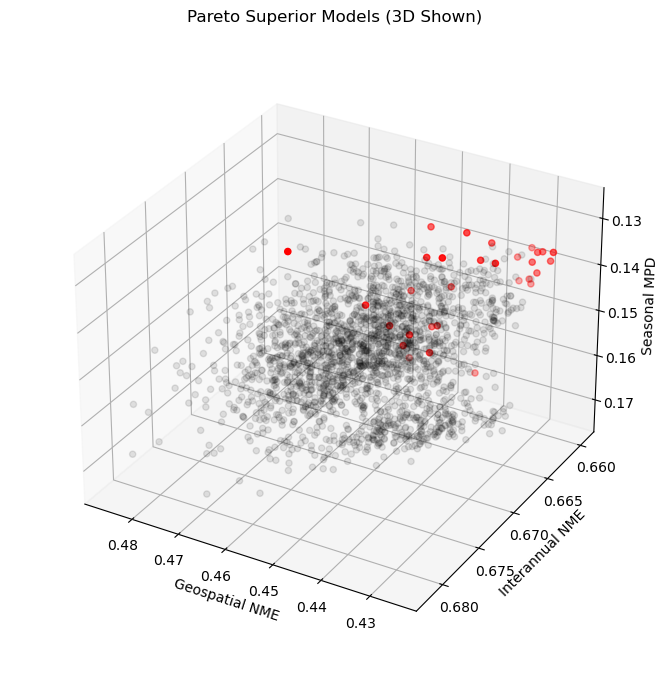

In [11]:
fig = plt.figure(figsize = (11, 7))
ax = plt.axes(projection = "3d")
 
# Creating plot
ax.scatter3D(inferior_df.NME_geospatial, inferior_df.NME_interannual, inferior_df.MPD_seasonal, color = "k", alpha = 0.1)
ax.scatter3D(superior_df.NME_geospatial, superior_df.NME_interannual, superior_df.MPD_seasonal, color = "r")

ax.invert_xaxis()
ax.invert_yaxis()
ax.invert_zaxis()

ax.set_xlabel('Geospatial NME')
ax.set_ylabel('Interannual NME')
ax.set_zlabel('Seasonal MPD')

ax.dist = 11

plt.title("Pareto Superior Models (3D Shown)")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Seasonal MPD')

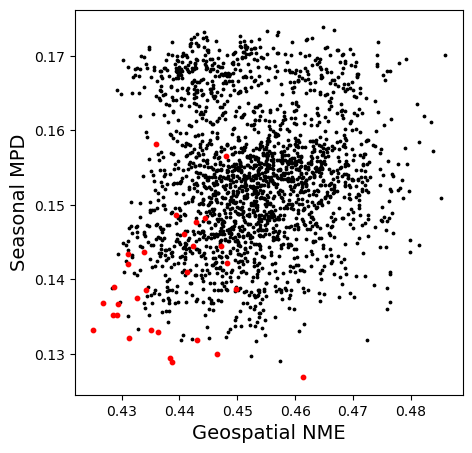

In [12]:
plt.figure(figsize = (5,5))
plt.scatter(df.NME_geospatial, df.MPD_seasonal, c = 'k', s = 3)
plt.scatter(superior_df.NME_geospatial, superior_df.MPD_seasonal, c = 'r', s = 10)
plt.xlabel('Geospatial NME', fontsize = 14)
plt.ylabel('Seasonal MPD', fontsize = 14)

In [13]:
direc = '/rds/general/user/tk22/home/fire_genesis/step_3/output/'
paths = listdir(direc)
path = paths[931]
temp = pd.read_csv(direc + path)
temp

,Unnamed: 0,value
0,a,11.048620
1,b,1.468000
2,AUC,0.866443
3,AIC,186939.731006
4,MaxVIF,2.907922
5,NME_geospatial,0.440063
6,NME_interannual,0.668356
7,NME_seasonal,0.875830
8,MPD_seasonal,0.148517
9,lo_DTR,0.009998


In [14]:
best_code

930

In [15]:
superior_df[superior_df.AUC == superior_df.AUC.max()]

,code,AUC,NME_geospatial,NME_interannual,NME_seasonal,MPD_seasonal
619,930,0.870502,0.440854,0.667437,0.738475,0.146135


----

#### "Best" Dataset:

In [16]:
from ds_builder import *

In [17]:
path = direc + f'output_summary_{best_code}.csv'
df = pd.read_csv(path)
thresh_row = df.set_index(df.columns[0]).T
variables = [x[3:] for x in thresh_row.columns if x[:3] == 'lo_']

In [18]:
a = float(thresh_row.a)
b = float(thresh_row.b)

In [19]:
da, params = build_ds(variables, thresh_row, N = 10 ** 8)

fire ~ DTR + GPP_100d + GPP_1y + HERB + PopDens_rural + TREE + VPD_31d + VPD_night + alpha_mean + precip + precip_5d + snow_cover
Adding variables to test-train:
	14.3% built
	28.6% built
	42.9% built
	57.1% built
	71.4% built
	85.7% built
	100.0% built
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   fire   No. Observations:             97771875
Model:                            GLM   Df Residuals:                 97771862
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.5084e+05
Date:                Fri, 29 Sep 2023   Deviance:                   1.9017e+06
Time:                        14:57:21   Pearson chi2:                 1.38e+08
No. Iterations:                    13   Pseudo R-squ. (CS):           0.003124
Covariance Type:            nonrobu

In [20]:
(a * da ** b).to_dataset().to_netcdf('ensemble_best_member.nc')

Text(0.5, 1.0, 'Mean Modelled Rate of Wildfire Occurrence')

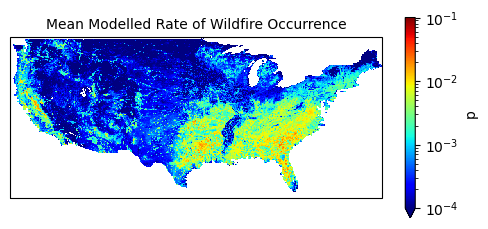

In [21]:
ds = xr.open_dataset('ensemble_best_member.nc')

plt.figure(figsize=(6, 2.6))

ax = plt.axes(projection = ccrs.InterruptedGoodeHomolosine())
ax.set_global()
ax.coastlines()

ax.set_xlim(ds.lon.min(), ds.lon.max())
ax.set_ylim(ds.lat.min(), ds.lat.max())

im = ds.p.mean(axis = 2).plot.pcolormesh(
    transform = ccrs.InterruptedGoodeHomolosine(),
    norm = colors.LogNorm(vmin = 10**-4, vmax = 10**-1),
    cmap = 'jet'
)

ax.set_title('Mean Modelled Rate of Wildfire Occurrence', 
             fontsize = 10)